In [1]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
pip install seaborn==0.9.0

     |████████████████████████████████| 208 kB 7.7 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [2]:
#Read the dataset into a pandas.DataFrame
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

In [3]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (43824, 13)


In [4]:
#Let's see the first five rows of the DataFrame
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
"""
Rows having NaN values in column pm2.5 are dropped.
"""
df.dropna(subset=['pm2.5'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'Box plot of pm2.5')

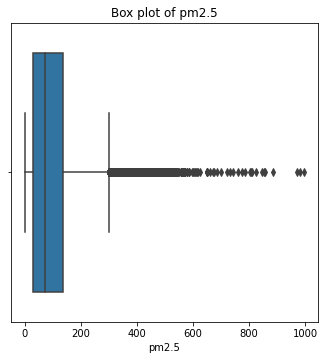

In [6]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['pm2.5'])
g.set_title('Box plot of pm2.5')

In [7]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

In [8]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


/usr/local/lib/python3.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'pm2.5 readings')

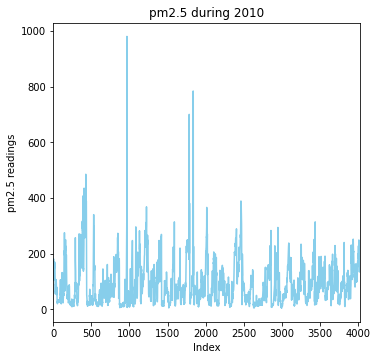

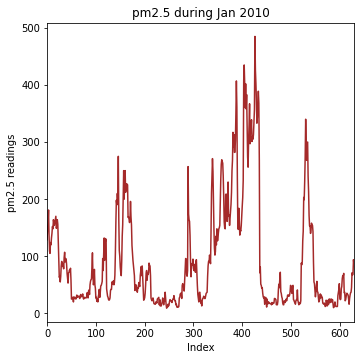

In [9]:
#Let's plot the series for six months to check if any pattern apparently exists.
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=6,day=30)], color='skyblue')
g.set_title('pm2.5 during 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

#Let's zoom in on one month.
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=1,day=31)], color='brown')
g.set_title('pm2.5 during Jan 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_PRES'] = scaler.fit_transform(np.array(df['PRES']).reshape(-1, 1))
df['scaled_pm2.5'] = scaler.fit_transform(np.array(df['pm2.5']).reshape(-1, 1))

In [11]:
"""
The dataset's time period if from
Jan 1st, 2010 to Dec 31st, 2014. The first fours years - 2010 to 2013 is used as train and
2014 is kept for validation.
"""
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
split_date ##기준 설정

datetime.datetime(2014, 1, 1, 0, 0)

In [12]:
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (33096, 16)
Shape of test: (8661, 16)


In [13]:
#Reset the indices of the validation set
df_val.reset_index(drop=True, inplace=True)
df_val.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_PRES,scaled_pm2.5
0,35065,2014,1,1,0,24.0,-20,7.0,1014.0,NW,143.48,0,0,2014-01-01 00:00:00,0.418182,0.024145
1,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.400000,0.053320
2,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.400000,0.065392
3,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.400000,0.070423
4,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.381818,0.079477


/usr/local/lib/python3.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Scaled pm2.5 readings')

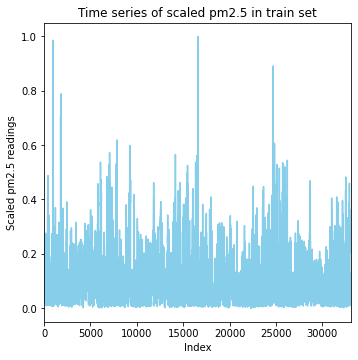

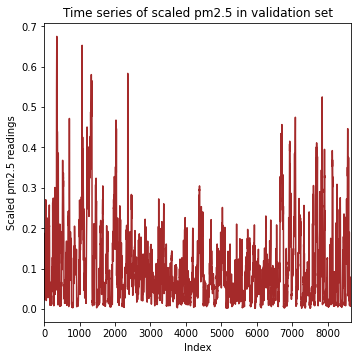

In [14]:
"""
The train and validation time series of scaled pm2.5 is also plotted.
"""

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_train['scaled_pm2.5'], color='skyblue')
g.set_title('Time series of scaled pm2.5 in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_val['scaled_pm2.5'], color='brown')
g.set_title('Time series of scaled pm2.5 in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

For the time series forecasting model, Past seven days of observations are used to predict for the next day,and equivalent to AR(7) model. 

Define a function which takes the original time series and the number of timesteps in regressors as input to generate the arrays of X and y 😊

In [51]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [52]:
X_train, y_train = makeXy(df_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (33089, 7) (33089,)


In [53]:
X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8654, 7) (8654,)


The input to convolution layers must be of shape (number of samples, number of timesteps, number of features per timestep). In this case we are modeling only pm2.5 hence number of features per timestep is one. Number of timesteps is seven and number of samples is same as the number of samples in X_train and X_val, which are reshaped to 3D arrays.

In [54]:
X_train.shape[0]

33089

In [55]:
X_train.shape[1] # time lag (7일동안의 값들 list)

7

In [56]:
X_train.reshape((X_train.shape[0], X_train.shape[1], 1)).shape 
## reshaped to 3d arrays 
##-shape (,,1)인 이유: considered feature only for pm2.5 variable

(33089, 7, 1)

In [57]:
#X_train and X_val are reshaped to 3D arrays
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)),\
                 X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
                 
print('Shape of arrays after reshaping:', X_train.shape, X_val.shape)

Shape of arrays after reshaping: (33089, 7, 1) (8654, 7, 1)


Modeling -GRU

In [59]:
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import ZeroPadding1D
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import AveragePooling1D
from tensorflow.keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings(action='ignore')
import random
from tqdm.notebook import tqdm
from scipy.interpolate import CubicSpline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, log_loss
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import Adamax, Adam
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.layers import Permute,multiply,Add,Multiply,BatchNormalization,Dropout, Conv1D, Input, Flatten, Bidirectional, MaxPooling1D, Activation, Flatten, Dense, Dropout, BatchNormalization, LSTM, TimeDistributed, SpatialDropout1D, GaussianNoise
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.merge import concatenate
from tensorflow.keras.utils import to_categorical, plot_model
import pydot
import graphviz
## GRU package 
from keras.layers import Dense, Input, Dropout
from keras.layers.recurrent import GRU
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [60]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(7,1), dtype='float32')

In [63]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
model_1_input  = Input(shape=(7,1), dtype='float32')
model_1 = GRU(64, input_shape=(7,1), return_sequences=True,activation='tanh')(model_1_input )
model_1 = Dropout(0.2)(model_1)
model_1= GRU(32, input_shape=(7,64), return_sequences=True,activation='tanh')(model_1)
model_1 = Dropout(0.2)(model_1)
model_1= GRU(16, input_shape=(7,32), return_sequences=False,activation='tanh')(model_1)
model_1 = Dropout(0.2)(model_1)
output_layer = Dense(1, activation='linear')(model_1)
final_model = Model(inputs=[model_1_input], outputs=output_layer)
final_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7, 1)]            0         
                                                                 
 gru_3 (GRU)                 (None, 7, 64)             12672     
                                                                 
 dropout_2 (Dropout)         (None, 7, 64)             0         
                                                                 
 gru_4 (GRU)                 (None, 7, 32)             9312      
                                                                 
 dropout_3 (Dropout)         (None, 7, 32)             0         
                                                                 
 gru_5 (GRU)                 (None, 16)                2352      
                                                                 
 dropout_4 (Dropout)         (None, 16)                0   

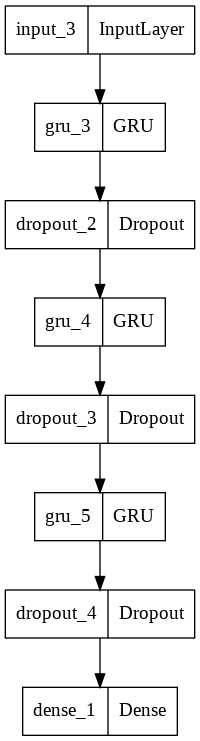

In [64]:
plot_model(final_model)

In [65]:
final_model.compile(loss='mean_absolute_error', optimizer='Adam', metrics=['acc']) ## classification -> loss='categorical_crossentropy'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
save_best = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = final_model.fit(x=X_train, y= y_train, epochs=20, callbacks=[es, save_best],
                          validation_data= (X_val, y_val), batch_size=16,shuffle=True)
#ts_model = Model(inputs=input_layer, outputs=output_layer)
#ts_model.compile(loss='mean_absolute_error', optimizer='adam')#SGD(lr=0.001, decay=1e-5))
#ts_model.summary()
#save_weights_at = os.path.join('keras_models', 'PRSA_data_Air_Pressure_1DConv_weights.{epoch:02d}-{val_loss:.4f}.hdf5')

Epoch 1/20
2067/2069 [============================>.] - ETA: 0s - loss: 0.0205 - acc: 6.0474e-05
Epoch 00001: val_loss improved from inf to 0.01294, saving model to best_model.h5
2069/2069 [==============================] - 46s 19ms/step - loss: 0.0205 - acc: 6.0443e-05 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 2/20
2069/2069 [==============================] - ETA: 0s - loss: 0.0177 - acc: 6.0443e-05
Epoch 00002: val_loss improved from 0.01294 to 0.01192, saving model to best_model.h5
2069/2069 [==============================] - 39s 19ms/step - loss: 0.0177 - acc: 6.0443e-05 - val_loss: 0.0119 - val_acc: 0.0000e+00
Epoch 3/20
2067/2069 [============================>.] - ETA: 0s - loss: 0.0173 - acc: 6.0474e-05
Epoch 00003: val_loss did not improve from 0.01192
2069/2069 [==============================] - 39s 19ms/step - loss: 0.0173 - acc: 6.0443e-05 - val_loss: 0.0126 - val_acc: 0.0000e+00
Epoch 4/20
2067/2069 [============================>.] - ETA: 0s - loss: 0.0170 - acc: 6.047

In [66]:
final_model.load_weights('/content/best_model.h5')
preds=final_model.predict(X_val)
preds

array([[0.11052605],
       [0.07307401],
       [0.0566435 ],
       ...,
       [0.00943123],
       [0.00955743],
       [0.0072284 ]], dtype=float32)

In [67]:
preds.shape

(8654, 1)

In [68]:
scaler.inverse_transform(preds) ## scaler.inverse_transform해서 원상태 복구

array([[109.86289 ],
       [ 72.63557 ],
       [ 56.303642],
       ...,
       [  9.37464 ],
       [  9.500085],
       [  7.18503 ]], dtype=float32)

In [69]:
pred_pm25 = np.squeeze(scaler.inverse_transform(preds))## np.squeeze 이용해서 차원 축소
pred_pm25 

array([109.86289 ,  72.63557 ,  56.303642, ...,   9.37464 ,   9.500085,
         7.18503 ], dtype=float32)

In [70]:
pred_pm25.mean()

98.22184

In [71]:
pred_pm25.shape

(8654,)

In [72]:
df_val['pm2.5'].loc[7:].mean()

97.75710654032817

In [73]:
from sklearn.metrics import r2_score
r2 = r2_score(df_val['pm2.5'].loc[7:], pred_pm25)
print('R-squared for the validation set:', round(r2, 4))

R-squared for the validation set: 0.946


Text(0.5, 0, 'Index')

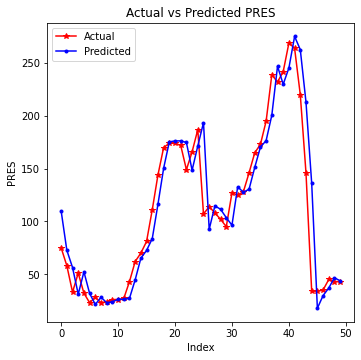

In [76]:
#Let's plot the first 50 actual and predicted values of PRES.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted PRES')
plt.ylabel('PRES')
plt.xlabel('Index')

Text(0.5, 0, 'Index')

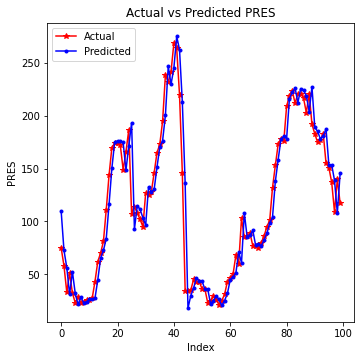

In [77]:
#plot the 100 actual and predicted values of PRES.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(100), df_val['pm2.5'].loc[7:106], linestyle='-', marker='*', color='r')
plt.plot(range(100), pred_pm25[:100], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted PRES')
plt.ylabel('PRES')
plt.xlabel('Index')